## Import Libraries

In [4]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

## Load the Data

In [31]:
df = pd.read_csv("final_data_msb.csv")

In [33]:
df.columns

Index(['Unnamed: 0', 'team', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value'],
      dtype='object')

In [35]:
df.shape

(4506, 19)

In [37]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [39]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


## Preprocess the Data

In [25]:
# uniqeness
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price


In [26]:
# Completeness
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

In [27]:
# Accurecy types
df.dtypes

Type            object
Region          object
Make            object
Gear_Type       object
Origin          object
Options         object
Year             int64
Engine_Size    float64
Mileage          int64
Negotiable        bool
Price            int64
dtype: object

In [28]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
categorical_features = ['Type', 'Region', 'Make', 'Gear_Type', 'Origin', 'Options']
numeric_features = ['Year', 'Engine_Size', 'Mileage']

In [80]:
for i in categorical_features:
    print(df[i].value_counts())

Type
Accent          141
Camry           127
Land Cruiser    116
Hilux           101
Sonata           98
               ... 
Liberty           1
SL                1
EC8               1
Envoy             1
301               1
Name: count, Length: 232, dtype: int64
Region
Riyadh            1434
Dammam             676
Jeddah             444
Al-Medina           97
Al-Ahsa             94
Qassim              88
Makkah              63
Aseer               62
Khobar              44
Taef                33
Jubail              29
Tabouk              26
Jazan               25
Abha                23
Hail                17
Al-Baha             13
Yanbu               11
Hafar Al-Batin      10
Najran              10
Al-Jouf              7
Al-Namas             7
Wadi Dawasir         4
Arar                 4
Sakaka               4
Besha                3
Qurayyat             2
Sabya                1
Name: count, dtype: int64
Make
Toyota        761
Hyundai       449
Ford          308
Chevrolet     255
Nissa

In [81]:
# Calculate the frequency of each 'Type'
type_counts = df['Type'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['Type'].isin(type_counts[type_counts >= 2].index)]

In [48]:
df.head(2)

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000


In [82]:
df.shape

(3205, 11)

In [83]:
# Calculate the frequency of each 'Make'
make_counts = df['Make'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['Make'].isin(make_counts[make_counts >=2].index)]

In [84]:
df.shape

(3205, 11)

In [15]:
#df[df['Type']=='Other']

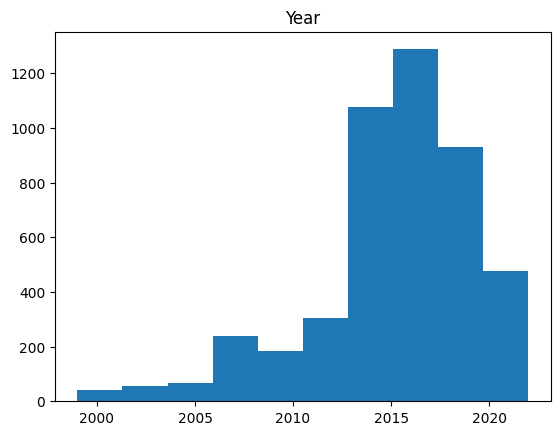

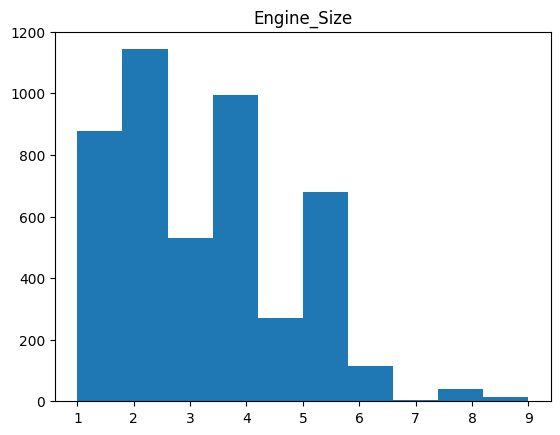

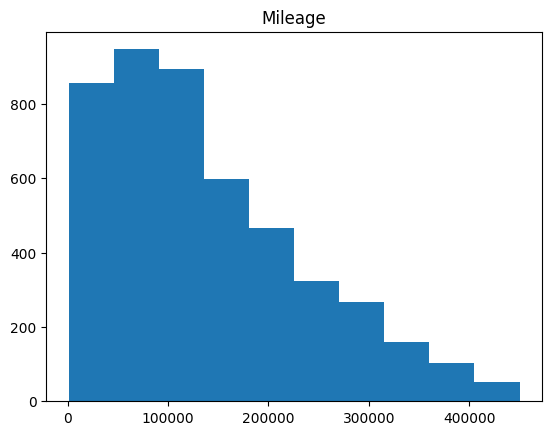

In [72]:
for i in numeric_features:
    plt.hist(df[i]);
    plt.title(i)
    plt.show()

In [56]:
df.shape

(5526, 11)

In [57]:
df = df[df['Year']>=1999]

In [58]:
df.shape

(5397, 11)

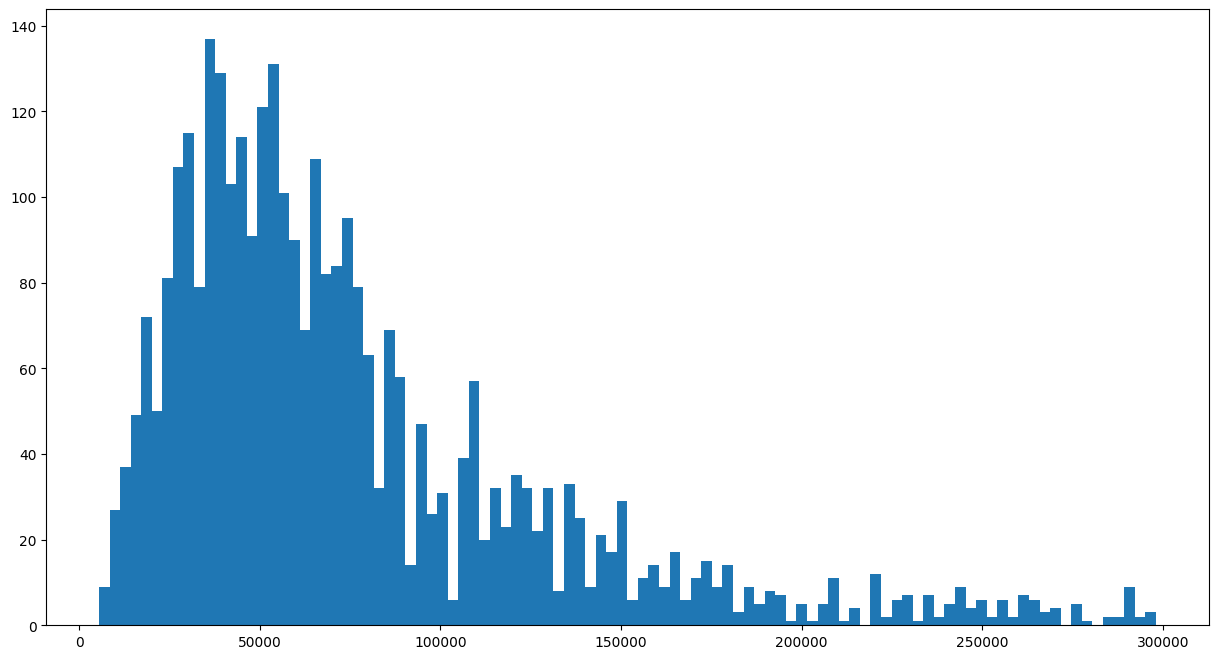

In [76]:
plt.figure(figsize=(15,8))
#plt.hist(df['Price']);
plt.hist(df[(df['Price']<=300000) & (df['Price']>5000)]['Price'], bins=100);
#plt.hist(df[(df['Price']<=400000) & (df['Price']>=5000)]['Price'], bins=100);

In [78]:
df = df[(df['Price']<=300000) & (df['Price']>=5000)]

In [79]:
df.shape

(3231, 11)

In [19]:
#df[df['Mileage']<1000]

In [67]:
df['Mileage'].min()

100

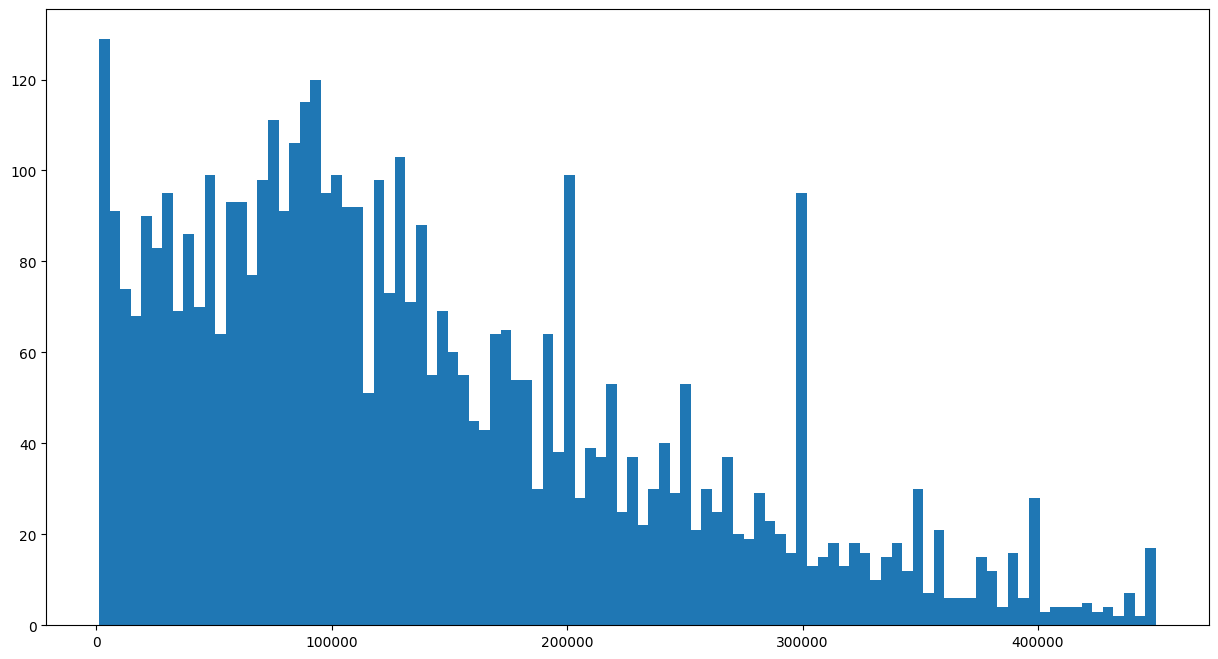

In [69]:
plt.figure(figsize=(15,8))
#plt.hist(df['Mileage']);
plt.hist(df[(df['Mileage']<=450000) & (df['Mileage']>1000)]['Mileage'], bins=100);
#plt.hist(df['Mileage'], bins=100);

In [71]:
df = df[(df['Mileage']<=450000) & (df['Mileage']>1000)]
df.shape

(4667, 11)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [41]:
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards', 
                    'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 'games_injured', 'award', 'current_value', 
                    'highest_value']

In [43]:
df.head(2)

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000
1,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [45]:
categorical_features

['team', 'position']

In [47]:
# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [49]:
df.shape

(4506, 399)

In [51]:
df.head(2)

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,position_Attack-SecondStriker,position_Defender Centre-Back,position_Defender Left-Back,position_Defender Right-Back,position_Goalkeeper,position_midfield-AttackingMidfield,position_midfield-CentralMidfield,position_midfield-DefensiveMidfield,position_midfield-LeftMidfield,position_midfield-RightMidfield
0,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,...,False,False,False,False,True,False,False,False,False,False
1,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,...,False,True,False,False,False,False,False,False,False,False


#### 3. Feature selection

In [27]:
# sns.heatmap(df.corr(), annot=True);

In [53]:
correlation = df.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.712995
appearance             0.327357
minutes played         0.314029
assists                0.105213
                         ...   
team_SV Ried          -0.050444
days_injured          -0.065745
goals conceded        -0.109175
position_Goalkeeper   -0.123967
age                   -0.262230
Name: current_value, Length: 399, dtype: float64


In [55]:
# Set the correlation threshold
threshold = 0.25  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['age', 'appearance', 'minutes played', 'current_value',
       'highest_value'],
      dtype='object')

In [57]:
selected_features = ['age', 'appearance', 'minutes played', 'current_value',
       'highest_value']

In [59]:
df = df[selected_features]
df.head()

,age,appearance,minutes played,current_value,highest_value
0,37.0,4,292,600000,6000000
1,21.0,34,2758,2000000,2000000
2,21.0,34,1030,3000000,7000000
3,33.0,31,2790,600000,3500000
4,30.0,8,644,600000,2000000


#### 4. Prepare train and test data

In [61]:
# Prepare data
X = df.drop(['current_value'], axis=1)
y = df['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X.shape

(4506, 4)

## Buliding the Model

In [65]:
model = LinearRegression()

## Train the Model

In [67]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

## Test the Model

In [69]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

## Interpretation of the Model

In [71]:
model.coef_

array([-569772.24049163, -293224.18968999,  512590.28577654,
       1156810.72816563])

In [73]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-5.697722e+05
appearance,-2.932242e+05
minutes played,5.125903e+05
highest_value,1.156811e+06


In [75]:
print(model.intercept_) 

1496656.4927857935


In [77]:
coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

NameError: name 'lasso_model' is not defined

## Evaluating the Model 

1. Mean Square Error

In [79]:
y_base = [y_train.mean()] * len(y_test)

In [81]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 2846589765041.2637


In [83]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 932536326707.7872
Mean Squared Error for testing: 1004934393170.4939


2. Mean Absolute Error

In [86]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 1246695.190857165


In [88]:
mae_train = mean_absolute_error(y_train, model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 708363.4344502932
Mean Absolute Error for testing: 727730.1190184534


3. Root Mean Squared Error

In [91]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 1116.555055004976


In [93]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 965679.2048645281
Root Mean Squared Error for testing: 1002464.1605416595


4. R Square

In [96]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.6427372365313484
R Square for testing: 0.6466677058961654


#### Predictions vs. Real Values

In [98]:
predictions = model.predict(X_test_scaled)
#predictions

In [100]:
Real_Values = np.array(y_test)
#Real_Values

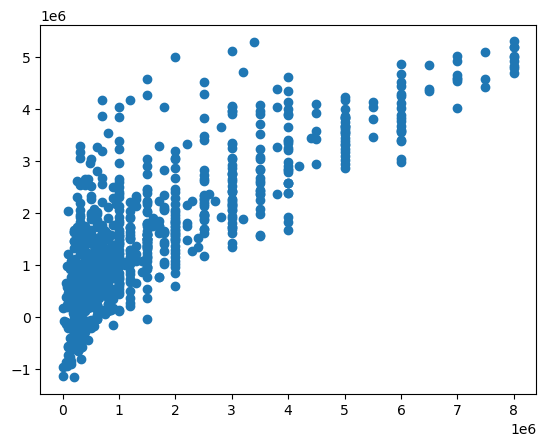

In [102]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

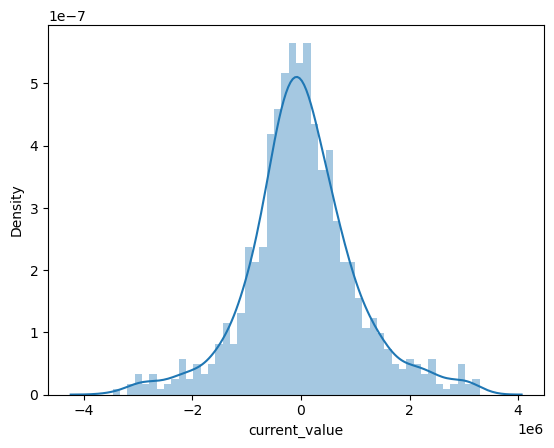

In [104]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution